In [1]:
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor
from datasets import load_dataset
import requests
from PIL import Image

/user_data/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "l-llama-3.2-11b-vision-finetuned/checkpoint-336"

model = MllamaForConditionalGeneration.from_pretrained(
    model_path,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

processor = AutoProcessor.from_pretrained("meta-llama/Llama-3.2-11B-Vision-Instruct")

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


In [34]:
def generate_product_description(image_path, processor, model, max_size=(500, 500), max_new_tokens=128):
    image = Image.open(image_path)
    image.thumbnail(max_size)

    promt = "Please write a concise and engaging description for this product and exclude backgrount or irrelation part:"
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": promt}
            ],
        }
    ]

    input_text = processor.apply_chat_template(messages, add_generation_prompt=True)

    inputs = processor(
        image,
        input_text,
        add_special_tokens=False,
        return_tensors="pt"
    ).to(model.device)
    
    output = model.generate(**inputs, max_new_tokens=max_new_tokens)

    description = processor.decode(output[0, inputs.input_ids.size(1):])
    return description, image

This image showcases five iPhone 15 models in a row, each with distinct colors: black, white, pink, green, and blue. The camera lenses are visible at the top left, and the Apple logo is centered on the back. The image is set against a clean white background, allowing the vibrant colors of the phones to take center stage.<|eot_id|>


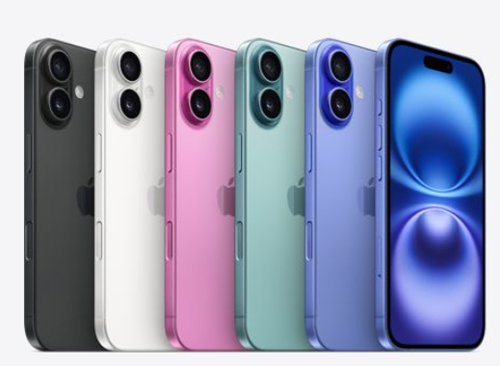

In [35]:
path = "./images/1.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

The image depicts a white Tesla car, showcasing its sleek and modern design. The vehicle is positioned at an angle, with its front end facing the left side of the image. The car's body is predominantly white, with subtle shading that accentuates its curves and contours. The headlights are black, adding a touch of sophistication to the overall design. The windshield, windows, and rearview mirror are also black, creating a sense of continuity and cohesion. The car's wheels feature a dark gray finish, which complements the white body and adds a hint of contrast. The background of the image is a light gray color, which provides a clean


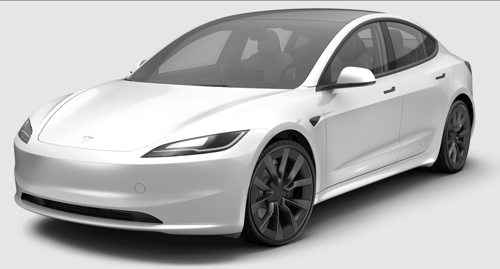

In [36]:
path = "./images/2.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

The image features four identical bottles of a light-colored, yellow-green liquid, likely a soft drink, arranged in a row. Each bottle has a bright green cap and a white label with black Chinese characters, accompanied by smaller Chinese writing in white on the bottom half of the bottle, which is a vibrant green color. The top of the label features a decorative pattern of small green diamonds. The background is a plain white surface.<|eot_id|>


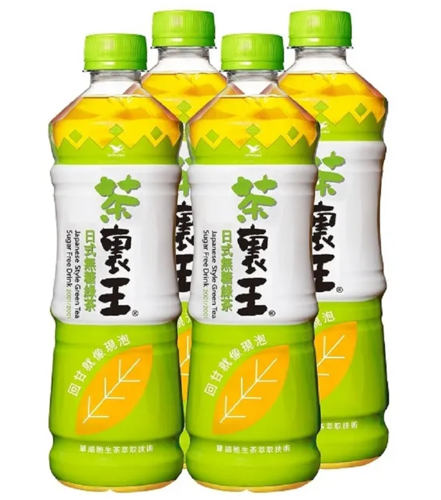

In [37]:
path = "./images/3.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

This image features a McDonald's Big Mac, a double-decker burger with two beef patties, special sauce, lettuce, pickles, and cheese, all nestled in a sesame seed bun. The burger is presented on a clean white background, allowing the vibrant colors of the ingredients to take center stage. The overall effect is one of mouthwatering appeal, making the viewer eager to take a bite.<|eot_id|>


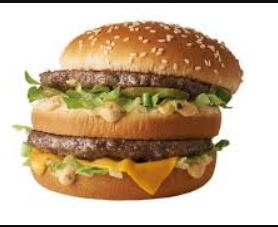

In [38]:
path = "./images/4.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

This image presents a close-up view of a person holding a substantial burger, showcasing their hands grasping the burger with care.

The burger features a toasted sesame seed bun, topped with a thick beef patty, crisp lettuce, juicy tomato, and thinly sliced white onion. The person's hands, with neatly manicured fingernails, cradle the burger, with only their torso visible in the background, wearing a black shirt with a vibrant green and orange stripe across the chest. The blurred background suggests a restaurant setting, with the person's body positioned in front of a wall adorned with a striking green, orange, and black striped pattern.


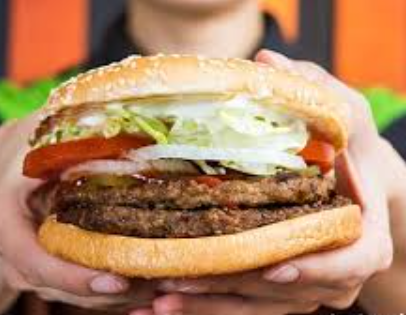

In [39]:
path = "./images/5.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()